In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Roblox_1.csv")
df.head()

,userName,score,at,content
0,Aldi Donald,5,2024-05-20 00:52:31,👍😜
1,2M Meuthia & Mikhayla,5,2024-05-20 00:50:45,Terimakasih atas gamenya anak saya suka banget👍
2,Arlian Kuning S.E S.H,5,2024-05-20 00:45:37,Gemanya bagus walaupun ada bug loncat² sendiri
3,Gjgghjj Gjvgjh,1,2024-05-20 00:39:41,bintang satu aja suda cupkup
4,Rafa Soit,5,2024-05-20 00:38:03,"Semua Game Bagus Seru Dan Menyenangkan, Game P..."


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,👍😜,Aldi Donald,2024-05-20 00:52:31
1,Terimakasih atas gamenya anak saya suka banget👍,2M Meuthia & Mikhayla,2024-05-20 00:50:45
2,Gemanya bagus walaupun ada bug loncat² sendiri,Arlian Kuning S.E S.H,2024-05-20 00:45:37
3,bintang satu aja suda cupkup,Gjgghjj Gjvgjh,2024-05-20 00:39:41
4,"Semua Game Bagus Seru Dan Menyenangkan, Game P...",Rafa Soit,2024-05-20 00:38:03
...,...,...,...
592,keren,Donnell Vito Salim,2024-05-19 09:44:26
593,Game nya sgt seruu,Adiva Fathiyyah sunoto,2024-05-19 09:44:03
594,Aku udah masukin nama dan password yang bener ...,Randu Putra,2024-05-19 09:43:27
595,aku tidak suka game ini tolong aku minta di ha...,Albian Fadli,2024-05-19 09:42:33


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,560,597,590
top,Bagus,Aldi Donald,2024-05-19 12:23:41
freq,12,1,2


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(560, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,,Aldi Donald,2024-05-20 00:52:31
1,terimakasih atas gamenya anak saya suka banget,2M Meuthia & Mikhayla,2024-05-20 00:50:45
2,gemanya bagus walaupun ada bug loncat sendiri,Arlian Kuning S.E S.H,2024-05-20 00:45:37
3,bintang satu aja suda cupkup,Gjgghjj Gjvgjh,2024-05-20 00:39:41
4,semua game bagus seru dan menyenangkan game pa...,Rafa Soit,2024-05-20 00:38:03
...,...,...,...
591,great,dewi ratih maharani,2024-05-19 09:45:01
593,game nya sgt seruu,Adiva Fathiyyah sunoto,2024-05-19 09:44:03
594,aku udah masukin nama dan password yang bener ...,Randu Putra,2024-05-19 09:43:27
595,aku tidak suka game ini tolong aku minta di ha...,Albian Fadli,2024-05-19 09:42:33


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,,Aldi Donald,2024-05-20 00:52:31
1,terimakasih atas gamenya anak saya suka banget,2M Meuthia & Mikhayla,2024-05-20 00:50:45
2,gamenya bagus walaupun ada bug loncat sendiri,Arlian Kuning S.E S.H,2024-05-20 00:45:37
3,bintang satu aja suda cupkup,Gjgghjj Gjvgjh,2024-05-20 00:39:41
4,semua game bagus seru dan menyenangkan game pa...,Rafa Soit,2024-05-20 00:38:03
...,...,...,...
591,great,dewi ratih maharani,2024-05-19 09:45:01
593,game nya sgt seruu,Adiva Fathiyyah sunoto,2024-05-19 09:44:03
594,aku udah masukin nama dan password yang bener ...,Randu Putra,2024-05-19 09:43:27
595,aku tidak suka game ini tolong aku minta di ha...,Albian Fadli,2024-05-19 09:42:33


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,,Aldi Donald,2024-05-20 00:52:31
1,terimakasih atas gamenya anak suka banget,2M Meuthia & Mikhayla,2024-05-20 00:50:45
2,gamenya bagus walaupun bug loncat sendiri,Arlian Kuning S.E S.H,2024-05-20 00:45:37
3,bintang satu aja suda cupkup,Gjgghjj Gjvgjh,2024-05-20 00:39:41
4,semua game bagus seru menyenangkan game paling...,Rafa Soit,2024-05-20 00:38:03
...,...,...,...
591,great,dewi ratih maharani,2024-05-19 09:45:01
593,game nya sgt seruu,Adiva Fathiyyah sunoto,2024-05-19 09:44:03
594,aku udah masukin nama password bener kenapa bi...,Randu Putra,2024-05-19 09:43:27
595,aku suka game tolong aku minta hapus kebanyaka...,Albian Fadli,2024-05-19 09:42:33


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                     []
1       [terimakasih, atas, gamenya, anak, suka, banget]
2       [gamenya, bagus, walaupun, bug, loncat, sendiri]
3                     [bintang, satu, aja, suda, cupkup]
4      [semua, game, bagus, seru, menyenangkan, game,...
                             ...                        
591                                              [great]
593                              [game, nya, sgt, seruu]
594    [aku, udah, masukin, nama, password, bener, ke...
595    [aku, suka, game, tolong, aku, minta, hapus, k...
596                             [keren, banget, gamenya]
Name: content, Length: 560, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Roblox_1.csv', index = False)


In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Roblox_1.csv', encoding = 'latin1')
df_clean

,content
0,NaN
1,terimakasih atas gamenya anak suka banget
2,gamenya bagus walaupun bug loncat sendiri
3,bintang satu aja suda cupkup
4,semua game bagus seru senang game paling seru ...
...,...
555,great
556,game nya sgt seruu
557,aku udah masukin nama password bener kenapa bi...
558,aku suka game tolong aku minta hapus banyak pa...


# **Translate**

In [23]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [24]:
import pandas as pd
from easynmt import EasyNMT

In [25]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Roblox_1.csv', encoding='latin1')

In [26]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [27]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.0MB/s]                   


In [28]:
df2 = df_clean.fillna(method = 'bfill')
df2

,content
0,terimakasih atas gamenya anak suka banget
1,terimakasih atas gamenya anak suka banget
2,gamenya bagus walaupun bug loncat sendiri
3,bintang satu aja suda cupkup
4,semua game bagus seru senang game paling seru ...
...,...
555,great
556,game nya sgt seruu
557,aku udah masukin nama password bener kenapa bi...
558,aku suka game tolong aku minta hapus banyak pa...


In [29]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Roblox_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Roblox_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.
1,1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.
2,2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...
3,3,bintang satu aja suda cupkup,"fontcolor="" # FFFF00""star fontcolor="" # FFFF00..."
4,4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.
...,...,...,...
555,555,great,Great.
556,556,game nya sgt seruu,It's a fungal game.
557,557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...
558,558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Roblox_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.
1,1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.
2,2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...
3,3,bintang satu aja suda cupkup,"fontcolor="" # FFFF00""star fontcolor="" # FFFF00..."
4,4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.
...,...,...,...
555,555,great,Great.
556,556,game nya sgt seruu,It's a fungal game.
557,557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...
558,558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 342
Netral = 131
Negatif = 87

Total Data Seluruhnya : 560


In [37]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
1,1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
2,2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...,Positif
3,3,bintang satu aja suda cupkup,"fontcolor="" # FFFF00""star fontcolor="" # FFFF00...",Netral
4,4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.,Positif
...,...,...,...,...
555,555,great,Great.,Positif
556,556,game nya sgt seruu,It's a fungal game.,Negatif
557,557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...,Positif
558,558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...,Positif


In [38]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...,Positif
3,bintang satu aja suda cupkup,"fontcolor="" # FFFF00""star fontcolor="" # FFFF00...",Netral
4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.,Positif
...,...,...,...
555,great,Great.,Positif
556,game nya sgt seruu,It's a fungal game.,Negatif
557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...,Positif
558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...,Positif


# **Visualisasi**


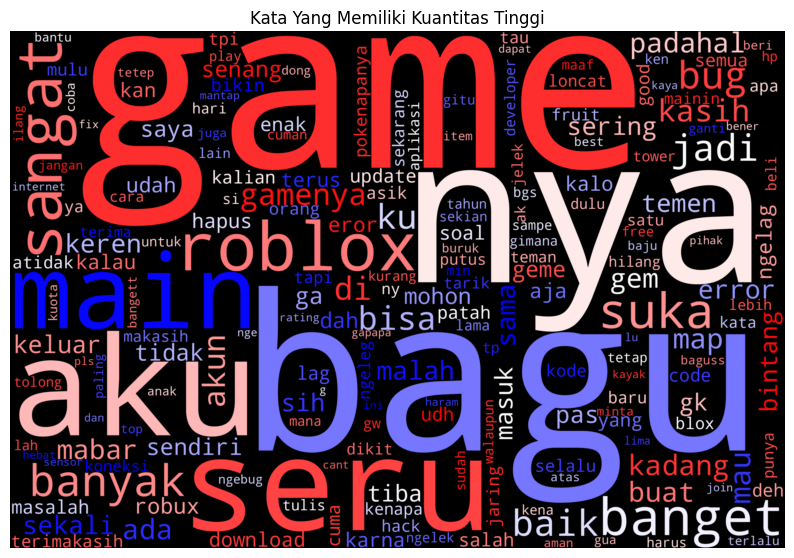

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


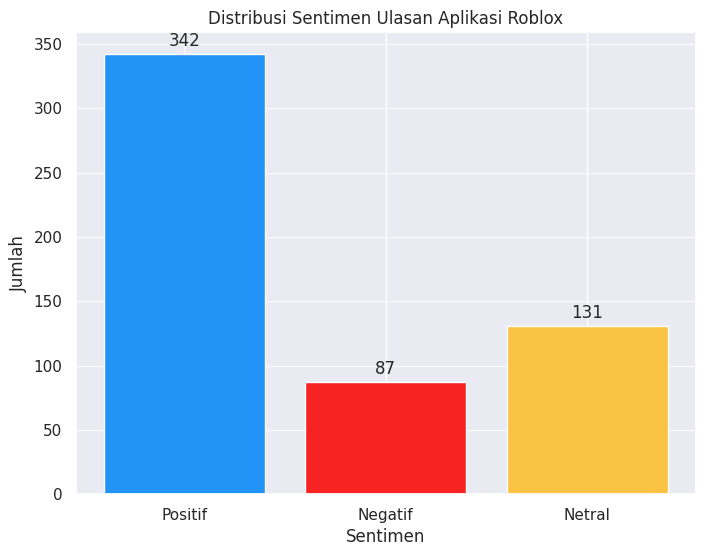

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Roblox")


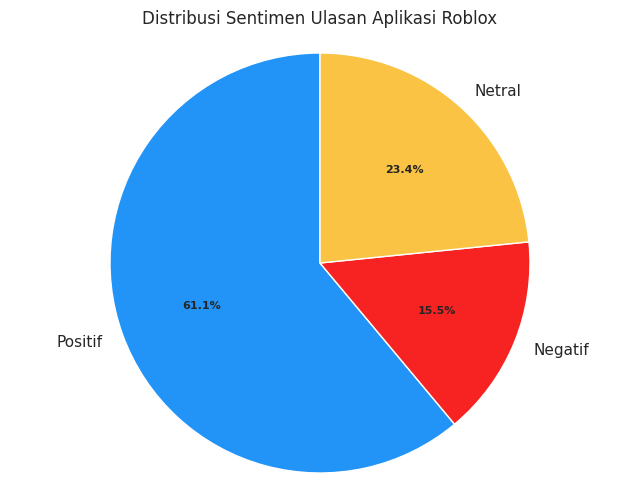

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Roblox")

In [42]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,Positif
2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...,Positif
4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.,Positif
5,jelek banget kaya momon sapi purba,It's so ugly. It's an old-fashioned momone.,Negatif
...,...,...,...
555,great,Great.,Positif
556,game nya sgt seruu,It's a fungal game.,Negatif
557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...,Positif
558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...,Positif


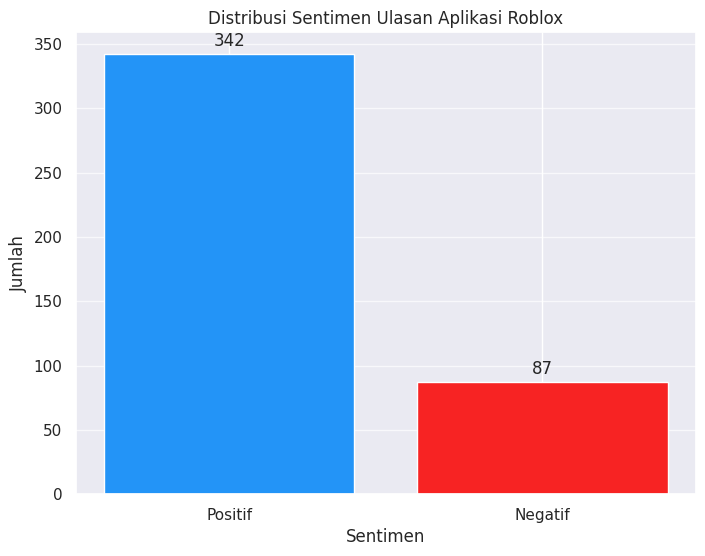

In [43]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Roblox")


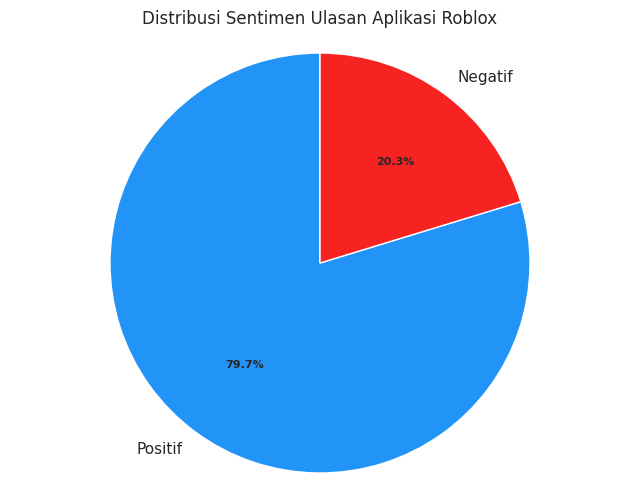

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Roblox")

In [45]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,1
1,terimakasih atas gamenya anak suka banget,Thanks for the game. Kids love it.,1
2,gamenya bagus walaupun bug loncat sendiri,It's a good game even though bugs jump themsel...,1
4,semua game bagus seru senang game paling seru ...,All good games. Great. Happy game.,1
5,jelek banget kaya momon sapi purba,It's so ugly. It's an old-fashioned momone.,0
...,...,...,...
555,great,Great.,1
556,game nya sgt seruu,It's a fungal game.,0
557,aku udah masukin nama password bener kenapa bi...,I've entered the password. It's true. How did ...,1
558,aku suka game tolong aku minta hapus banyak pa...,I love games. Please. I'm asking you to remove...,1


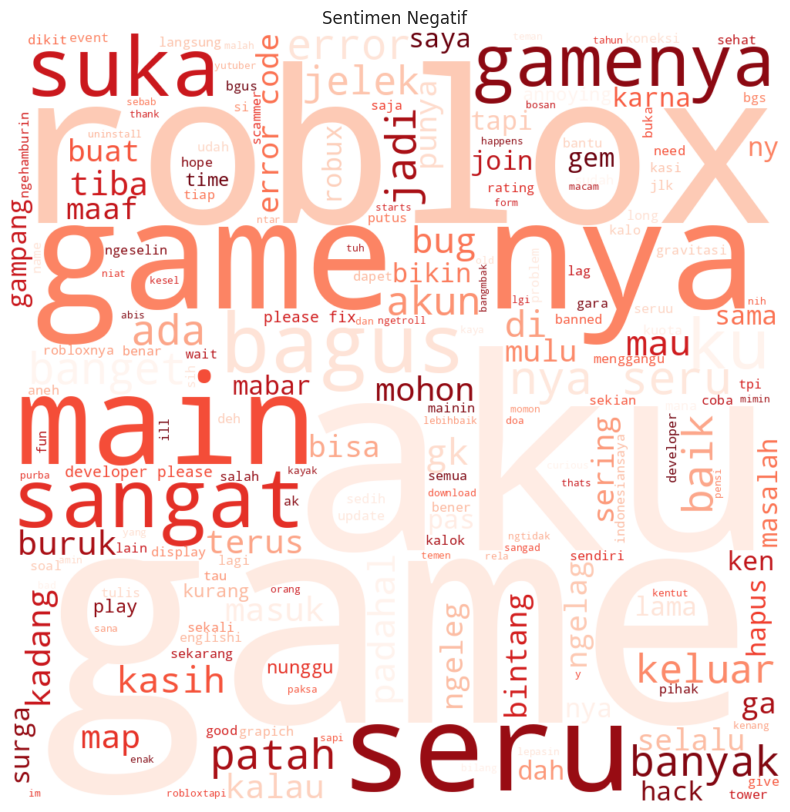

In [46]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

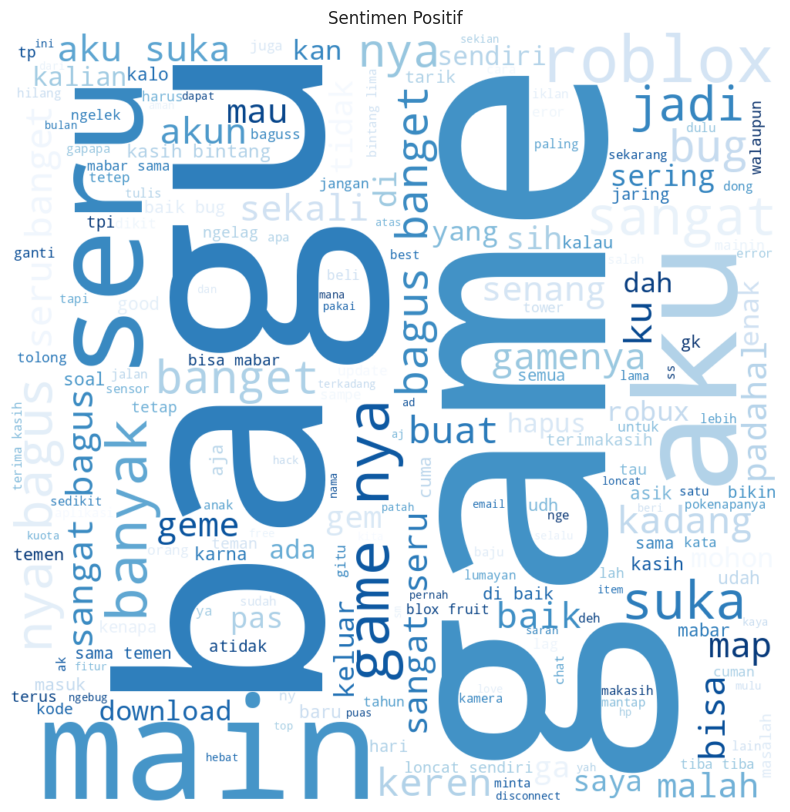

In [47]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [48]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    342
0     87
Name: count, dtype: int64

# **Data Preparation**

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [52]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

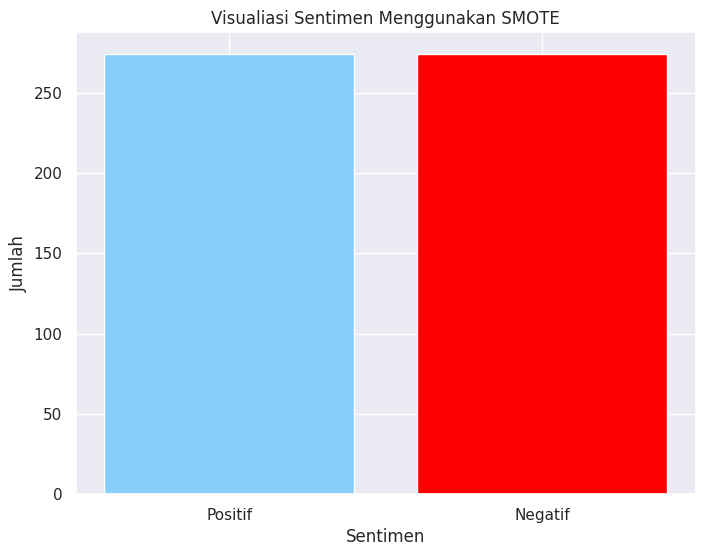

In [53]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [54]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [55]:
y_pred = naive_bayes.predict(X_test_vec)

In [56]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7790697674418605

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.47      0.39      0.42        18
     Positif       0.85      0.88      0.86        68

    accuracy                           0.78        86
   macro avg       0.66      0.64      0.64        86
weighted avg       0.77      0.78      0.77        86



In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 7 11]
 [ 8 60]]

Accuracy =  0.7790697674418605


In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 7 11]
 [ 8 60]]

True Positives (TP) =  7

True Negatives (TN) =  60

False Positives (FP) =  11

False Negatives (FN) =  8

Accuracy =  0.7790697674418605


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

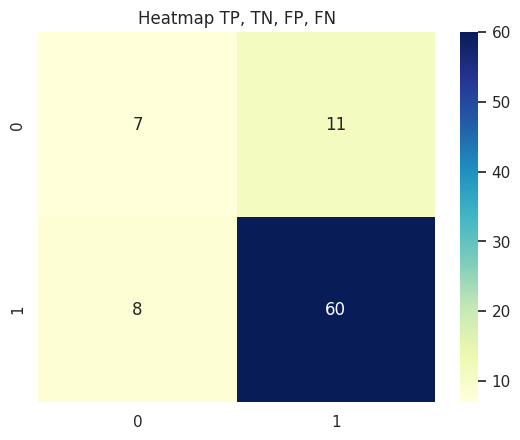

In [59]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [60]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [61]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7791


In [62]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2209


# **Testing**


In [63]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : suka error
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [64]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus bgt gamenya
Hasil Analisis Sentimen Untuk Teks Baru : Positif
